# GEN Dataset Analysis

This notebook analyzes the training and test splits from the GEN (General) dataset, examining:
- Dataset sizes
- Class distributions (sarcastic vs. not sarcastic)
- Text length statistics
- Other relevant data characteristics

## 1. Import Required Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Datasets

In [11]:
# Define paths
data_dir = Path('../data/splits')

# Load the datasets
gen_train = pd.read_csv(data_dir / 'gen_train.csv')
gen_test = pd.read_csv(data_dir / 'gen_test.csv')

print("✓ Datasets loaded successfully")
print(f"  - Training set: {len(gen_train)} samples")
print(f"  - Test set: {len(gen_test)} samples")

✓ Datasets loaded successfully
  - Training set: 5216 samples
  - Test set: 1304 samples


## 3. Dataset Overview

In [12]:
print("=" * 60)
print("TRAINING SET")
print("=" * 60)
print(f"\nShape: {gen_train.shape}")
print(f"\nColumns: {list(gen_train.columns)}")
print(f"\nData types:\n{gen_train.dtypes}")
print(f"\nFirst few samples:")
gen_train.head()

TRAINING SET

Shape: (5216, 3)

Columns: ['class', 'id', 'text']

Data types:
class    object
id        int64
text     object
dtype: object

First few samples:


,class,id,text
0,sarc,4786,"Just to be pedantic, a better analogy would be..."
1,sarc,4519,"Said like a lazy, ignorant person who would ra..."
2,notsarc,5767,"First, I think you may have misunderstood the ..."
3,notsarc,823,"And once again, is this a strong enough rebutt..."
4,sarc,4778,Good- we were tired of you not responding or s...


In [13]:
print("=" * 60)
print("TEST SET")
print("=" * 60)
print(f"\nShape: {gen_test.shape}")
print(f"\nColumns: {list(gen_test.columns)}")
print(f"\nData types:\n{gen_test.dtypes}")
print(f"\nFirst few samples:")
gen_test.head()

TEST SET

Shape: (1304, 3)

Columns: ['class', 'id', 'text']

Data types:
class    object
id        int64
text     object
dtype: object

First few samples:


,class,id,text
0,notsarc,5302,Because the judges President Bush nominates ar...
1,sarc,5921,You're as loony as she is. But then you're a b...
2,notsarc,1013,Being refuted by organized groups with an agen...
3,notsarc,1650,"Well, there's plenty of scientific evidence ab..."
4,notsarc,5290,Well then this doesn't answer my question.If y...


## 4. Class Distribution Analysis

In [14]:
# Class distribution in training set
train_label_counts = gen_train['class'].value_counts().sort_index()
train_label_pcts = gen_train['class'].value_counts(normalize=True).sort_index() * 100

print("TRAINING SET - Class Distribution")
print("=" * 60)
for label in train_label_counts.index:
    count = train_label_counts[label]
    pct = train_label_pcts[label]
    print(f"{label:10s}: {count:5d} samples ({pct:5.2f}%)")
print(f"{'Total':10s}: {len(gen_train):5d} samples")

# Class distribution in test set
test_label_counts = gen_test['class'].value_counts().sort_index()
test_label_pcts = gen_test['class'].value_counts(normalize=True).sort_index() * 100

print("\n\nTEST SET - Class Distribution")
print("=" * 60)
for label in test_label_counts.index:
    count = test_label_counts[label]
    pct = test_label_pcts[label]
    print(f"{label:10s}: {count:5d} samples ({pct:5.2f}%)")
print(f"{'Total':10s}: {len(gen_test):5d} samples")

TRAINING SET - Class Distribution
notsarc   :  2608 samples (50.00%)
sarc      :  2608 samples (50.00%)
Total     :  5216 samples


TEST SET - Class Distribution
notsarc   :   652 samples (50.00%)
sarc      :   652 samples (50.00%)
Total     :  1304 samples


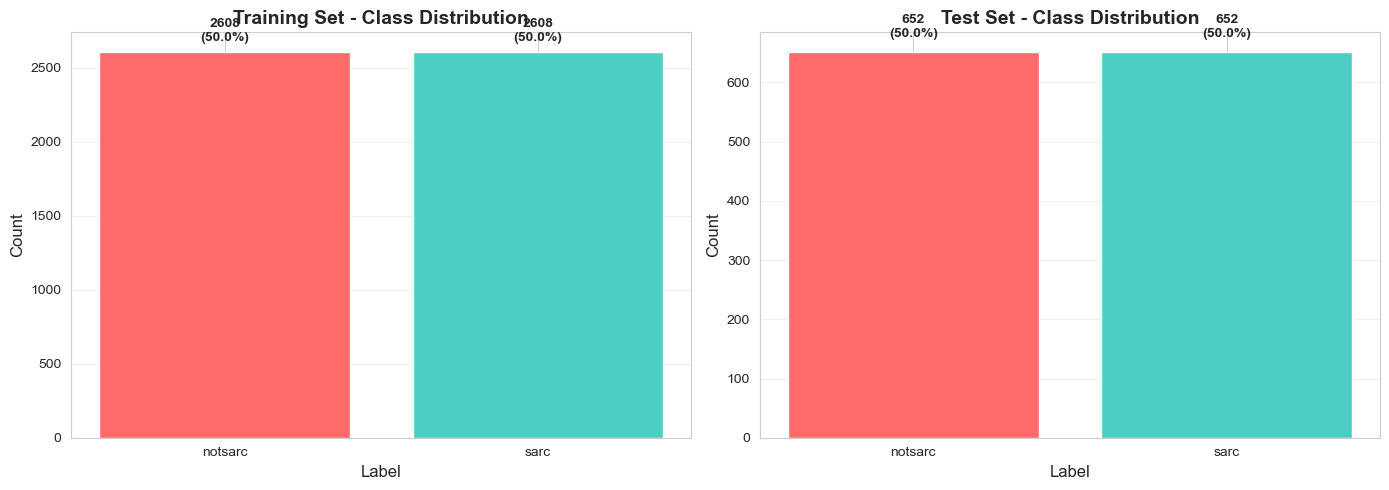

In [15]:
# Visualize class distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].bar(train_label_counts.index, train_label_counts.values, color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Training Set - Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, (label, count) in enumerate(zip(train_label_counts.index, train_label_counts.values)):
    axes[0].text(i, count + 50, f'{count}\n({train_label_pcts[label]:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

# Test set
axes[1].bar(test_label_counts.index, test_label_counts.values, color=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('Test Set - Class Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Label', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, (label, count) in enumerate(zip(test_label_counts.index, test_label_counts.values)):
    axes[1].text(i, count + 20, f'{count}\n({test_label_pcts[label]:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Text Length Statistics

In [16]:
# Calculate text lengths
gen_train['text_length'] = gen_train['text'].str.len()
gen_train['word_count'] = gen_train['text'].str.split().str.len()

gen_test['text_length'] = gen_test['text'].str.len()
gen_test['word_count'] = gen_test['text'].str.split().str.len()

# Statistics by dataset
print("TEXT LENGTH STATISTICS")
print("=" * 60)
print("\nTraining Set:")
print(gen_train[['text_length', 'word_count']].describe())

print("\n\nTest Set:")
print(gen_test[['text_length', 'word_count']].describe())

TEXT LENGTH STATISTICS

Training Set:
       text_length   word_count
count  5216.000000  5216.000000
mean    249.607554    43.655100
std     183.053715    31.694148
min      38.000000    10.000000
25%     113.000000    20.000000
50%     188.000000    33.000000
75%     327.000000    58.000000
max    1167.000000   150.000000


Test Set:
       text_length   word_count
count  1304.000000  1304.000000
mean    240.182515    42.057515
std     177.124002    30.421882
min      42.000000    10.000000
25%     110.000000    19.000000
50%     186.000000    32.000000
75%     307.000000    54.000000
max    1312.000000   148.000000


In [17]:
# Statistics by class
print("\nTEXT LENGTH STATISTICS BY CLASS")
print("=" * 60)
print("\nTraining Set:")
print(gen_train.groupby('class')[['text_length', 'word_count']].describe())

print("\n\nTest Set:")
print(gen_test.groupby('class')[['text_length', 'word_count']].describe())


TEXT LENGTH STATISTICS BY CLASS

Training Set:
        text_length                                                       \
              count        mean         std   min     25%    50%     75%   
class                                                                      
notsarc      2608.0  303.576687  205.125838  38.0  140.00  249.0  425.25   
sarc         2608.0  195.638420  138.296782  45.0  100.75  152.0  245.00   

                word_count                                                \
            max      count       mean        std   min   25%   50%   75%   
class                                                                      
notsarc  1167.0     2608.0  52.803298  35.238266  10.0  25.0  44.0  75.0   
sarc      935.0     2608.0  34.506902  24.499891  10.0  17.0  27.0  43.0   

                
           max  
class           
notsarc  150.0  
sarc     150.0  


Test Set:
        text_length                                                       \
              cou

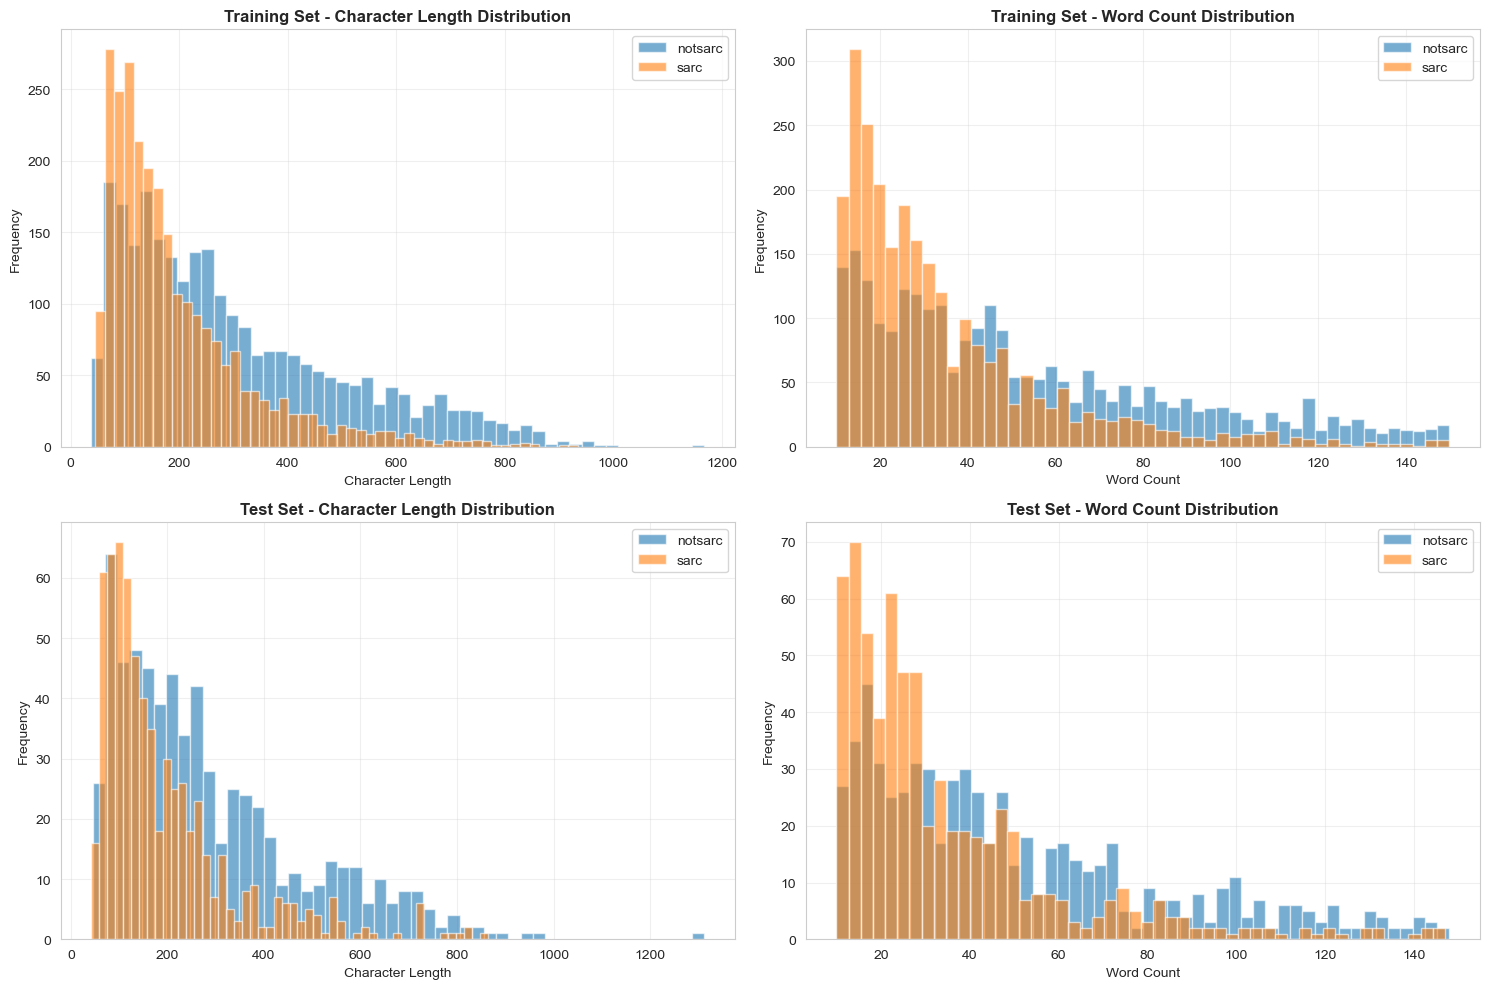

In [18]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training set - character length
for label in ['notsarc', 'sarc']:
    data = gen_train[gen_train['class'] == label]['text_length']
    axes[0, 0].hist(data, bins=50, alpha=0.6, label=label)
axes[0, 0].set_title('Training Set - Character Length Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Character Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Training set - word count
for label in ['notsarc', 'sarc']:
    data = gen_train[gen_train['class'] == label]['word_count']
    axes[0, 1].hist(data, bins=50, alpha=0.6, label=label)
axes[0, 1].set_title('Training Set - Word Count Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Test set - character length
for label in ['notsarc', 'sarc']:
    data = gen_test[gen_test['class'] == label]['text_length']
    axes[1, 0].hist(data, bins=50, alpha=0.6, label=label)
axes[1, 0].set_title('Test Set - Character Length Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Character Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Test set - word count
for label in ['notsarc', 'sarc']:
    data = gen_test[gen_test['class'] == label]['word_count']
    axes[1, 1].hist(data, bins=50, alpha=0.6, label=label)
axes[1, 1].set_title('Test Set - Word Count Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Train/Test Split Ratio

TRAIN/TEST SPLIT ANALYSIS
Total samples: 6,520
Training samples: 5,216 (80.0%)
Test samples: 1,304 (20.0%)
Train/Test ratio: 4.00:1


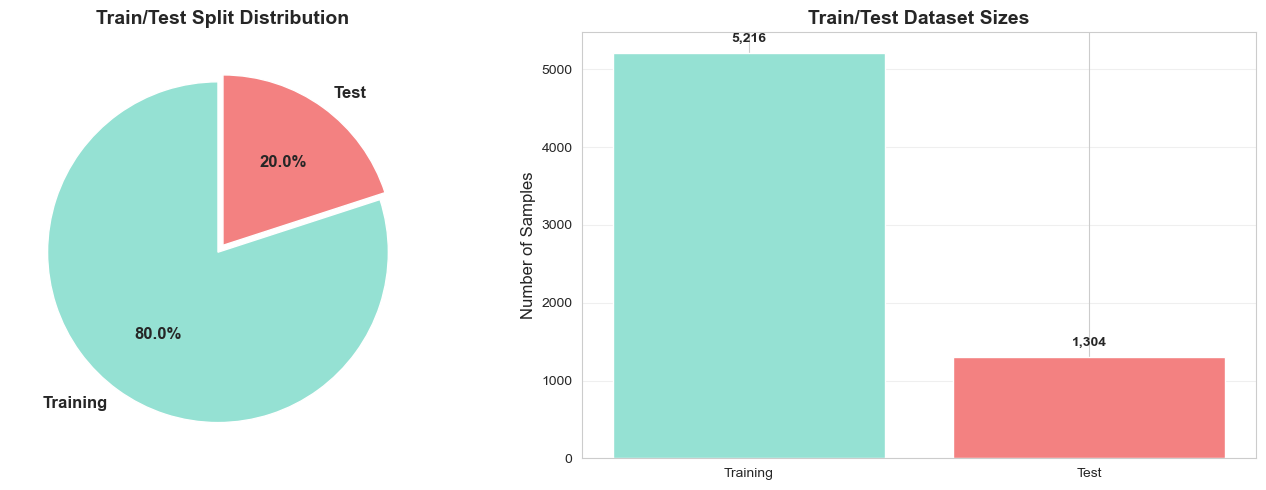

In [19]:
# Calculate split ratios
total_samples = len(gen_train) + len(gen_test)
train_ratio = len(gen_train) / total_samples * 100
test_ratio = len(gen_test) / total_samples * 100

print("TRAIN/TEST SPLIT ANALYSIS")
print("=" * 60)
print(f"Total samples: {total_samples:,}")
print(f"Training samples: {len(gen_train):,} ({train_ratio:.1f}%)")
print(f"Test samples: {len(gen_test):,} ({test_ratio:.1f}%)")
print(f"Train/Test ratio: {len(gen_train)/len(gen_test):.2f}:1")

# Visualize split
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#95E1D3', '#F38181']
explode = (0.05, 0)
ax1.pie([len(gen_train), len(gen_test)], 
        labels=['Training', 'Test'],
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Train/Test Split Distribution', fontsize=14, fontweight='bold')

# Bar chart
ax2.bar(['Training', 'Test'], [len(gen_train), len(gen_test)], color=colors)
ax2.set_ylabel('Number of Samples', fontsize=12)
ax2.set_title('Train/Test Dataset Sizes', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate([len(gen_train), len(gen_test)]):
    ax2.text(i, v + 100, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Comprehensive Summary Table

In [20]:
# Create comprehensive summary
summary_data = {
    'Metric': [
        'Total Samples',
        'Sarcastic Samples',
        'Non-Sarcastic Samples',
        'Class Balance (%)',
        'Avg Character Length',
        'Avg Word Count',
        'Min Character Length',
        'Max Character Length',
        'Min Word Count',
        'Max Word Count'
    ],
    'Training Set': [
        len(gen_train),
        len(gen_train[gen_train['class'] == 'sarc']),
        len(gen_train[gen_train['class'] == 'notsarc']),
        f"{train_label_pcts['sarc']:.1f} / {train_label_pcts['notsarc']:.1f}",
        f"{gen_train['text_length'].mean():.1f}",
        f"{gen_train['word_count'].mean():.1f}",
        gen_train['text_length'].min(),
        gen_train['text_length'].max(),
        gen_train['word_count'].min(),
        gen_train['word_count'].max()
    ],
    'Test Set': [
        len(gen_test),
        len(gen_test[gen_test['class'] == 'sarc']),
        len(gen_test[gen_test['class'] == 'notsarc']),
        f"{test_label_pcts['sarc']:.1f} / {test_label_pcts['notsarc']:.1f}",
        f"{gen_test['text_length'].mean():.1f}",
        f"{gen_test['word_count'].mean():.1f}",
        gen_test['text_length'].min(),
        gen_test['text_length'].max(),
        gen_test['word_count'].min(),
        gen_test['word_count'].max()
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 80)
print("COMPREHENSIVE DATASET SUMMARY")
print("=" * 80)
print(summary_df.to_string(index=False))
summary_df


COMPREHENSIVE DATASET SUMMARY
               Metric Training Set    Test Set
        Total Samples         5216        1304
    Sarcastic Samples         2608         652
Non-Sarcastic Samples         2608         652
    Class Balance (%)  50.0 / 50.0 50.0 / 50.0
 Avg Character Length        249.6       240.2
       Avg Word Count         43.7        42.1
 Min Character Length           38          42
 Max Character Length         1167        1312
       Min Word Count           10          10
       Max Word Count          150         148


,Metric,Training Set,Test Set
0,Total Samples,5216,1304
1,Sarcastic Samples,2608,652
2,Non-Sarcastic Samples,2608,652
3,Class Balance (%),50.0 / 50.0,50.0 / 50.0
4,Avg Character Length,249.6,240.2
5,Avg Word Count,43.7,42.1
6,Min Character Length,38,42
7,Max Character Length,1167,1312
8,Min Word Count,10,10
9,Max Word Count,150,148


## 8. Key Findings

### Dataset Composition:
- **Training Set**: Used for fine-tuning the models (SFT and DPO)
- **Test Set**: Used for evaluation and comparison

### Class Balance:
- Both training and test sets are perfectly balanced (50% sarcastic, 50% non-sarcastic)
- This ensures unbiased model training and fair evaluation

### Split Ratio:
- Approximately 80% training, 20% test split
- Standard practice for machine learning model development